In [653]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.callbacks import EarlyStopping

In [633]:
df = pd.read_csv('data/train.csv')

In [634]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


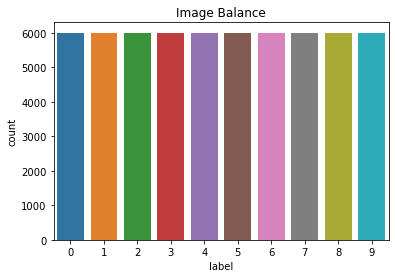

In [654]:
plt.title('Image Balance');
sns.countplot(data=df, x='label');

In [655]:
# Baseline value
df['label'].value_counts(normalize=True)

0    0.1
1    0.1
2    0.1
3    0.1
4    0.1
5    0.1
6    0.1
7    0.1
8    0.1
9    0.1
Name: label, dtype: float64

The values are equally distributed in the training data, so we do not have to account for outliers.

In [635]:
X = df.drop(columns = 'label')
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

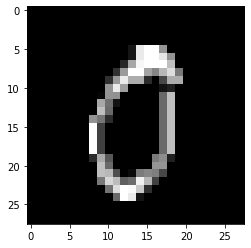

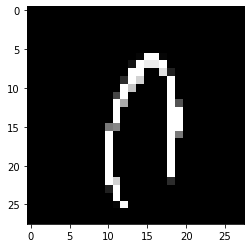

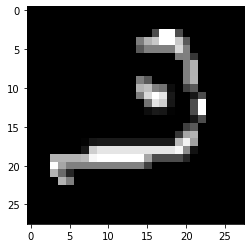

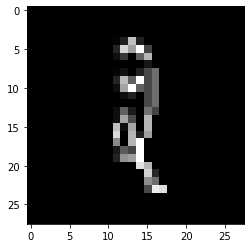

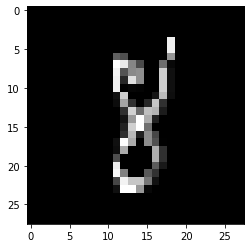

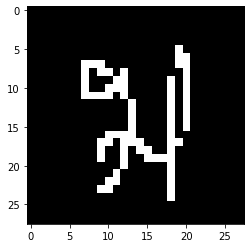

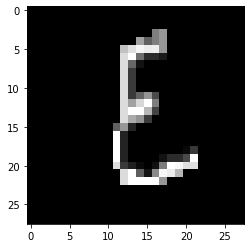

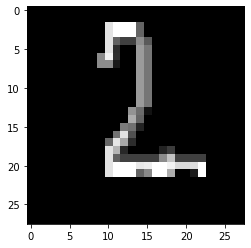

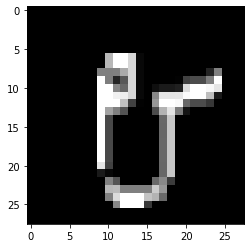

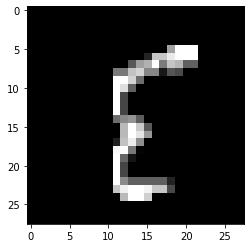

In [652]:
X_plt = X.to_numpy()
X_plt = X_plt.reshape(X_plt.shape[0], 28, 28, 1)

# Show symbols for 0 to 9
for i in range(10):
    plt.imshow(X_plt[i], cmap=plt.get_cmap('gray'))
    plt.show()

In [636]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [637]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [638]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [639]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [641]:
cnn = Sequential()

In [642]:
cnn.add(Conv2D(filters = 6, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

Only two convolution layers were created. Having more or less would cause the accuracy to decrease.

In [643]:
cnn.add(Flatten())
cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dense(32, activation = 'relu'))
cnn.add(Dense(10, activation = 'softmax'))

Having more than two dense layers would not make the accuracy increase.

In [644]:
cnn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [645]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1)

In [646]:
cnn.fit(X_train, y_train,
       validation_data = (X_test, y_test),
        batch_size = 256,
        epochs = 50,
        callbacks = early_stop
)

Epoch 1/50
176/176 [==============================] - 9s 50ms/step - loss: 0.5367 - accuracy: 0.8507 - val_loss: 0.1300 - val_accuracy: 0.9595
Epoch 2/50
176/176 [==============================] - 8s 46ms/step - loss: 0.1085 - accuracy: 0.9670 - val_loss: 0.0816 - val_accuracy: 0.9753
Epoch 3/50
176/176 [==============================] - 8s 47ms/step - loss: 0.0732 - accuracy: 0.9776 - val_loss: 0.0608 - val_accuracy: 0.9819
Epoch 4/50
176/176 [==============================] - 8s 48ms/step - loss: 0.0566 - accuracy: 0.9829 - val_loss: 0.0535 - val_accuracy: 0.9841
Epoch 5/50
176/176 [==============================] - 9s 49ms/step - loss: 0.0459 - accuracy: 0.9859 - val_loss: 0.0441 - val_accuracy: 0.9855
Epoch 6/50
176/176 [==============================] - 8s 44ms/step - loss: 0.0386 - accuracy: 0.9878 - val_loss: 0.0439 - val_accuracy: 0.9866
Epoch 7/50
176/176 [==============================] - 10s 58ms/step - loss: 0.0333 - accuracy: 0.9896 - val_loss: 0.0376 - val_accuracy: 0.988

In [668]:
cnn.summary()

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_95 (Conv2D)          (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d_94 (MaxPoolin  (None, 13, 13, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_96 (Conv2D)          (None, 11, 11, 16)        880       
                                                                 
 max_pooling2d_95 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_48 (Flatten)        (None, 400)               0         
                                                                 
 dense_153 (Dense)           (None, 128)             

In [647]:
y_preds = [np.argmax(arr) for arr in cnn.predict(X_test)]
y_test_again = [np.argmax(arr) for arr in y_test]

In [648]:
y_total = [[y_preds[i], y_test_again[i]] for i in range(len(y_preds))]

In [649]:
# Number of unique (predicted, actual) pairs for y_test
y_unique = np.unique(y_total, axis = 0, return_counts = True)

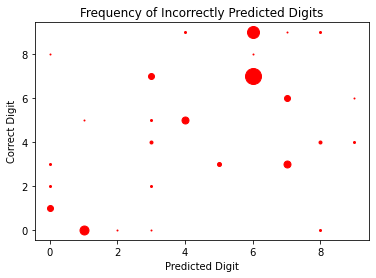

In [650]:
for i in range(len(y_unique[0])):
    if y_unique[0][i][0] != y_unique[0][i][1]:
        plt.plot(y_unique[0][i][0], y_unique[0][i][1], 'ro', markersize=y_unique[1][i])

plt.title("Frequency of Incorrectly Predicted Digits")
plt.xlabel("Predicted Digit")
plt.ylabel("Correct Digit");

Since the symbols for 0 and 1 look very similar, it is not surprising that there are a significant number of times where 0 and 1 were mistaken for each other using the model. On the other hand, it is odd that there are much more cases in which a 6 was identified as a 7 or a 9 than vice versa, as the three also look similar.

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1465, 1507, 1549, 1470, 1527, 1484, 1468, 1521, 1459, 1448]


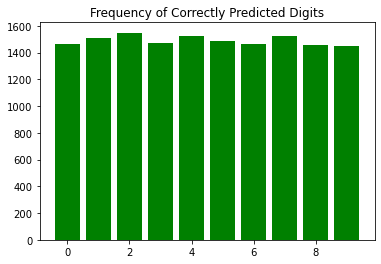

In [651]:
vals = list(range(10))
vals_count = []

for i in range(len(y_unique[0])):
    if y_unique[0][i][0] == y_unique[0][i][1]:
        vals_count.append(y_unique[1][i])
        
print(vals)
print(vals_count)
      
plt.bar(x = vals, height = vals_count, color = 'green')
plt.title("Frequency of Correctly Predicted Digits");

The symbol for 2 is the most unique since it covers a great horizontal distance, so it is expected that the most correctly predicted digits would be 2's.

In [660]:
df_test = pd.read_csv('data/test.csv')

Xt = df_test.drop(columns = 'id')
Xt = Xt.astype('float32')/255.0
Xt = Xt.to_numpy()
Xt = Xt.reshape(Xt.shape[0], 28, 28, 1)

In [661]:
yt = cnn.predict(Xt)

In [663]:
yt_again = [np.argmax(arr) for arr in yt]

In [665]:
preds_df = pd.DataFrame({'id': df_test['id'], 'label': yt_again})

In [667]:
preds_df.to_csv('data/submission.csv', index = False)

After submitting to Kaggle, the accuracy for half of the test dataset was 0.9688 and the accuracy for the other half was 0.971, indicating that our model is well fit.